# <font color='Purple'>Ciência dos Dados => na Pratica</font>


## <font color='blue'>Web Scraping Site de Empregos - Buscando quem saca de Dados</font>

## <font size="4">O que vamos fazer ==> Webscraping e Análise de Dados em Portais de Vagas no Brasil</font>



Nesse #NaPratica dessa semana, iremos conectar em um dos maiores portais de vagas do Brasil, o Indeed, fazer web scraping de dados sobre as vagas cujo o skill seja DADOS e então analisar o resultado, extraindo insights e aplicando Processamento de Linguagem Natural. O exemplo pode ser facilmente aplicado a outros portais, com os devidos ajustes.



Usaremos o Chromedriver para o processo de extração. Acesse o endereço abaixo, faça o download do arquivo de acordo com seu sistema operacional, bem como de acordo com a versao do seu Google Chrome, descompacte o zip e coloque o arquivo na mesma pasta onde está este Jupyter Notebook.

https://sites.google.com/a/chromium.org/chromedriver/home

Execute cada uma das células, leia os comentários, estude o código e faça modificações para customizar essa aula.

## <font color='Blue'>Carregando os Pacotes Usados Neste Jupyter Notebook

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou
# prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook, se necessário.

In [ ]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter
#n otebook.
!pip install -q -U watermark

In [ ]:
# Precisaremos do selenium
!pip install -q selenium

In [ ]:
# Imports
import bs4
import selenium
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup
from collections import Counter
%matplotlib inline

In [ ]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Ciência dos Dados" --iversions

pandas             1.0.1
nltk               3.4.5
selenium           3.141.0
selenium.webdriver 3.14.1
bs4                4.8.2
matplotlib         3.1.3
numpy              1.18.1
Ciência dos Dados


## Web Scraping

In [ ]:
# Cria o driver de conexão. Será aberta outra janela do navegador. 
# Não feche-a e mantenha aberta durante a extração.
driver = webdriver.Chrome("./chromedriver")


In [ ]:
# Cria o dataframe para receber os dados
dados = pd.DataFrame(columns = ["Titulo", "Localidade", "Empresa", "Salario", "Tipo_Pesquisa", "Desc"])

A url abaixo foi gerada da seguinte forma:
    
- 1- Acesso ao site https://www.indeed.com.br

- 2- Seleção dos filtros de pesquisa de vagas com o termo "Dados" 
- 3- Então copiamos a url na barra de endereço do navegador.

Você pode executar o mesmo procedimento e customizar sua busca, alterando localidade ou o tipo de vaga por exemplo. Copie a url e coloque na célula abaixo. Então execute o Jupyter Notebook novamente.

Evite executar a célula abaixo muitas vezes seguidas ou seu acesso pode ser bloqueado pelo site.

In [ ]:
# Abre a conexão com o site e faz a pesquisa
driver.get("https://www.indeed.com.br/jobs?q=data+science&l=")
driver.implicitly_wait(1)

In [ ]:
# Gravamos o resultado do scraping
resultado = driver.find_elements_by_class_name("result")

In [ ]:
# Tipo do objeto
type(resultado)

list

In [ ]:
# Temos apenas os elementos web. Precisamos agora extrair o texto desses elementos
resultado

[<selenium.webdriver.remote.webelement.WebElement (session="593ee86c191d3f48b91b1f4fee0e1199", element="de5fbe43-5fef-447e-944b-e7f7301ee3fc")>,
 <selenium.webdriver.remote.webelement.WebElement (session="593ee86c191d3f48b91b1f4fee0e1199", element="34bbbe09-4851-45c9-8a16-22bdd2f6a904")>,
 <selenium.webdriver.remote.webelement.WebElement (session="593ee86c191d3f48b91b1f4fee0e1199", element="df545aa5-7097-4fb1-a224-2caf6c0358aa")>,
 <selenium.webdriver.remote.webelement.WebElement (session="593ee86c191d3f48b91b1f4fee0e1199", element="1b5a5920-c336-48ed-b7ae-75a226a1f6f6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="593ee86c191d3f48b91b1f4fee0e1199", element="50145bd5-7d70-4b3f-9796-bc5701e88481")>,
 <selenium.webdriver.remote.webelement.WebElement (session="593ee86c191d3f48b91b1f4fee0e1199", element="0597e0bb-7c15-498c-ba49-95ce3944559b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="593ee86c191d3f48b91b1f4fee0e1199", element="37e367fe-78d5-47ed-b539-0b

Agora extraímos os dados do nosso interesse.

In [ ]:
# Loop pelos resultados do scraping e extração dos dados nas tags HTML do nosso interesse
for vaga in resultado:
    
    # Primeiro coletamos o elemento HTML interno
    result_html = vaga.get_attribute('innerHTML')
    
    # Fazemos então o parser do código HTML
    soup = BeautifulSoup(result_html, 'html.parser')
    
    # Buscamos as tags para análise. 
    # Usaremos blocos try/except para evitar erros na execução, no caso de ua informação não estar disponível na vaga
    
    # Título da vaga
    try:
        title = soup.find("a", class_ = "jobtitle").text.replace('\n', '')
    except:
        title = 'None'
    
    # Localidade
    try:
        location = soup.find(class_ = "location").text
    except:
        location = 'None'
    
    # Empresa
    try:
        company = soup.find(class_ = "company").text.replace('\n', '').strip()
    except:
        company = 'None'
    
    # Salário
    try:
        salary = soup.find("a", class_ = "salary").text.replace('\n', '').strip()
    except:
        salary = 'None'
    
    # Tipo de pesquisa (orgânica ou patrocinada)
    try:
        sponsored = soup.find("a", class_ = "sponsoredGray").text
        sponsored = "Sponsored"
    except:
        sponsored = 'Organic'
        
       
    # Descrição da vaga
    job_desc = soup.find_all(name="div", attrs={"id":"vjs-desc"})
    #job_desc = driver.find_element_by_css_selector('vjs-desc').text
    
    # Gravamos o resultado em nosso dataframe
    dados = dados.append({"Titulo":title, 
                          "Localidade":location, 
                          "Empresa":company, 
                          "Salario":salary, 
                          "Tipo_Pesquisa":sponsored, 
                          "Desc":job_desc}, 
                         ignore_index = True)

In [ ]:
# Shape
dados.shape

(30, 6)

In [ ]:
# Visualizamos os dados
dados.head()

,Titulo,Localidade,Empresa,Salario,Tipo_Pesquisa,Desc
0,Data Scientist Pleno,"São Paulo, SP",Home to Go,None,Organic,[]
1,Data Scientist,"Hortolândia, SP",IBM,None,Organic,[]
2,Programme Coordinator (m/f/d) Support to the G...,"Brasília, DF",Deutsche Gesellschaft für Internationale Zusam...,None,Organic,[]
3,Head of Growth,"São Paulo, SP",UZZO Pagamentos,None,Organic,[]
4,"Senior Development Coordination Officer, Econo...","Brasília, DF",United Nations,None,Organic,[]


Legal. Temos dados para trabalhar! Vamos salvar em disco para não perder os dados ao fechar o Jupyter Notebook.

In [ ]:
# Salvamos os dados em disco
dados.to_csv('dados.csv', encoding = "utf-8", index = False)

## Análise de Dados

In [ ]:
# Carregamos o dataset
df = pd.read_csv("dados.csv", encoding = "utf-8")

In [ ]:
# Shape
df.shape

(30, 6)

In [ ]:
# Visualiza os dados
df.head(10)

,Titulo,Localidade,Empresa,Salario,Tipo_Pesquisa,Desc
0,Data Scientist Pleno,"São Paulo, SP",Home to Go,None,Organic,[]
1,Data Scientist,"Hortolândia, SP",IBM,None,Organic,[]
2,Programme Coordinator (m/f/d) Support to the G...,"Brasília, DF",Deutsche Gesellschaft für Internationale Zusam...,None,Organic,[]
3,Head of Growth,"São Paulo, SP",UZZO Pagamentos,None,Organic,[]
4,"Senior Development Coordination Officer, Econo...","Brasília, DF",United Nations,None,Organic,[]
5,Jurídico | Estagiário,"Rio de Janeiro, RJ",Hurb - Hotel Urbano,None,Organic,[]
6,Data Science Immersive Instructor,Amazonas,GA Instructor,None,Organic,[]
7,Estágio - Ciências da Computação/Sistemas de i...,"Santo Antônio de Lisboa, SC",IEL/SC,None,Organic,[]
8,Estágio em Data Science,"Florianópolis, SC",Programa de Estágio,None,Organic,[]
9,Data Scientists,"Rio de Janeiro, RJ",Modec Brazil,None,Organic,[]


### Tarefa 1: Qual o tipo de vaga mostrado na pesquisa, orgânica ou patrocinada?

In [ ]:
# Vamos contar o total de registros por valor da coluna "Tipo_Pesquisa"
df["Tipo_Pesquisa"].value_counts()

Organic    30
Name: Tipo_Pesquisa, dtype: int64

Todas as vagas foram orgânicas.

### Tarefa 2: Quais empresas tem o maior número de vagas listadas?

In [ ]:
# Agrupa o dataset por empresa
grupo1 = df.groupby("Empresa").count()["Titulo"].sort_values(ascending = False)[:20]

In [ ]:
# Visualiza os dados
grupo1.head()

Empresa
dunnhumby              2
Viridis Energy         2
United Nations         2
UZZO Pagamentos        2
Programa de Estágio    2
Name: Titulo, dtype: int64

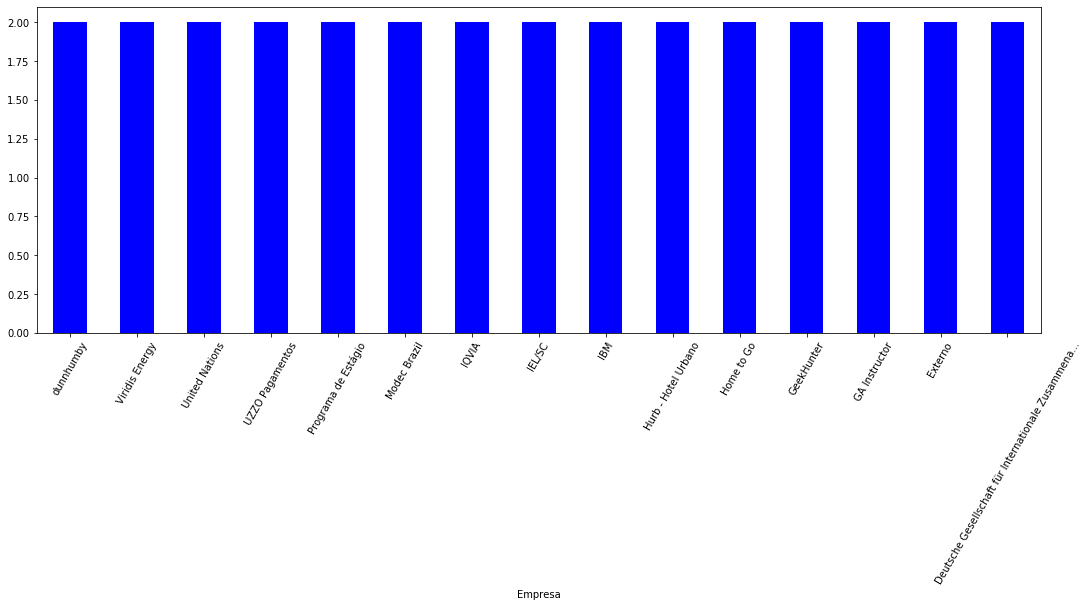

In [ ]:
# Gráfico
grupo1.plot(kind = "bar", figsize = (18,6), color = "blue", rot = 60)

### Tarefa 3: Qual localidade tem o maior número de vagas listadas?

In [ ]:
# Busca localidade com mais vagas
grupo2 = df.groupby("Localidade").count()["Titulo"].sort_values(ascending = False)[:20]

In [ ]:
# Visualiza os dados
grupo2.head()

Localidade
São Paulo, SP                  8
Rio de Janeiro, RJ             6
Brasília, DF                   4
Santo Antônio de Lisboa, SC    2
Nova Lima, MG                  2
Name: Titulo, dtype: int64

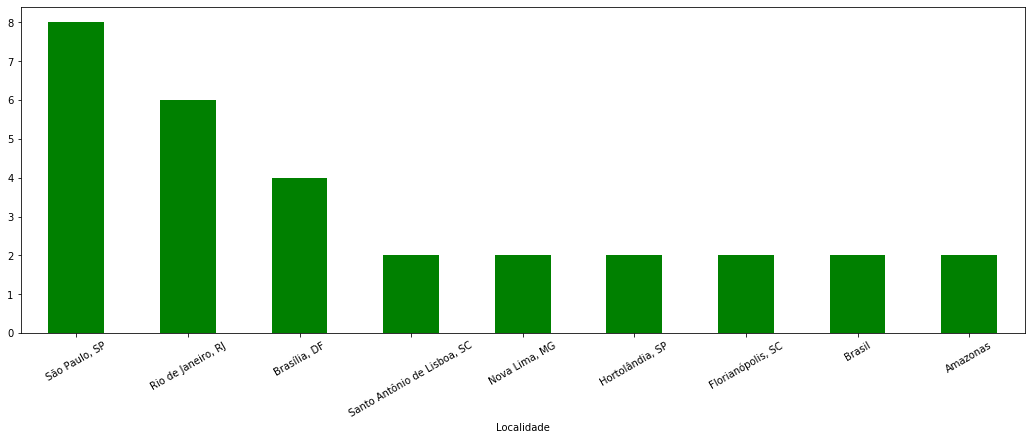

In [ ]:
# Gráfico
grupo2.plot(kind = "bar", figsize = (18,6), color = "green", rot = 30)

# Fim

### #Facebook - Ciência dos Dados - <a href="http://facebook.com/cienciadosdadosbr">facebook.com/cienciadosdadosbr</a>

### #**Telegram** - Scripts e Datasets - Comunidade Telegram <a href="https://t.me/cienciadosdados">https://t.me/cienciadosdados</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

In [5]:
from IPython.core.display import HTML
HTML('<iframe width="300" height="200" src="https://www.youtube.com/embed/EbxV4I0BkXk" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')